# Exercice 1. Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Jeu de données
np.random.seed(44)
taille = 100
sigma = 0.1
noise = sigma * np.random.randn(taille)
x = np.linspace(0, 2, taille)
data = 3+ 2 * x + noise

# 1. Formule mathématique pour la descente de gradient

L'objectif de cet exercice est d'effectuer une régression linéaire sur l'échantillon de points proposé. On utilisera la méthode de la descente de gradient pour ajuster les coefficients a et b.  

L'objectif est donc de minimiser la somme des distances des points à la droite de régression, autrement dit minimiser cette fonction f :  
$$
f(a, b) = \sum_{i=0}^{99}\sqrt{(x[i] - x[i])^2 + (data[i] - (a*x[i] + b))^2}
$$

$$
<=> f(a, b) = \sum_{i=0}^{99}\sqrt{(data[i] - a*x[i] - b)^2}
$$

Le principe de la descente de gardient est le suivant : pour trouver le minimum, il suffit d'effectuer des petits pas dans le sens de la descente, juqu'au momment où la pente s'annule. La pente s'annule signifie que le gradient s'annule. Le gradient est composé des dérivés partielles de la fonction f.

$$
grad(f) = \Bigg[\begin{array}{ll}
                \frac{\partial f}{\partial a} (a, b) \\
                \frac{\partial f}{\partial b} (a, b) \\
           \end{array} \Bigg]
$$

$$
<=> grad(f) = \Bigg[\begin{array}{ll}
                  \sum_{i=0}^{99}\frac{-(data[i] - a*x[i] - b)x[i]}{\sqrt{(data[i] - a*x[i] - b)^2}} \\
                  \sum_{i=0}^{99}\frac{-(data[i] - a*x[i] - b)}{\sqrt{(data[i] - a*x[i] - b)^2}} \\
               \end{array} \Bigg]
$$



# 2. Traduction en code Python

In [3]:
def f(a, b):
    s = 0
    for i in range(len(x)):
        s += ((data[i] - a*x[i] - b)**2)**(1/2)
    return s

def grad(a, b):
    grad_a = 0
    grad_b = 0
    for i in range(len(x)):
        grad_a += (-(data[i] - a*x[i] - b)*x[i]) / ((data[i] - a*x[i] - b)**2)**(1/2)
        grad_b += (-(data[i] - a*x[i] - b)) / ((data[i] - a*x[i] - b)**2)**(1/2)
    return grad_a, grad_b # composantes du gradient

In [4]:
def descente_grad(f, grad, a, b, alpha=0.001, epochs=1000):
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 0.01)
    # epochs est le nombre maximum d'itération (par défaut 1000)
    
    grad_a, grad_b = grad(a,b)
    i = 0
    while i <= epochs:
        if i == 0 or i == round(epochs/2):
            plt.scatter(x, data, marker='.')
            plt.plot([x[0], x[99]], [a*x[0]+b, a*x[99]+b], c='red')
            plt.show()
        
        grad_a, grad_b = grad(a,b) # on calcule la pente
        a = a - alpha*grad_a # on effectue un petit pas vers le bas selon a
        b = b - alpha*grad_b # on effectue un petit pas vers le bas selon b
        i += 1
    
    plt.scatter(x, data, marker='.')
    plt.plot([x[0], x[99]], [a*x[0]+b, a*x[99]+b], c='red')
    plt.show()
    
    return a,b

# 3. Exécution et détermination des poids (coefficients)

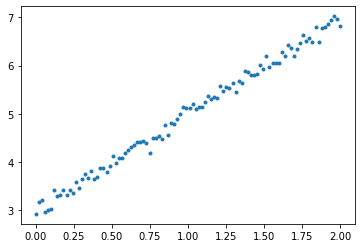

In [5]:
# Affichage du nuage de points
plt.scatter(x, data, marker='.')
plt.show()

Je vais choisir "à la main" des coefficients pour a et b.  
Je fais le choix prendre les coefficients de la droite qui relie le premier point au dernier point du nuage de points.

In [6]:
a = round((data[99] - data[0]) / (x[99] - x[0]), 2)
b = round(data[0], 2)
print(a, b)

1.95 2.92


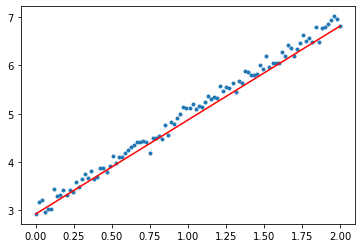

In [7]:
# Affichage du nuage de points et de la droite de régression ayant pour coefficients ceux choisis précédemment
plt.scatter(x, data, marker='.')
plt.plot([x[0], x[99]], [a*x[0]+b, a*x[99]+b], c='red')
plt.show()

In [8]:
# Somme des distances de tous les points à la droite avec les coefficients a et b choisis à la main
f(a, b)

13.618823212516853

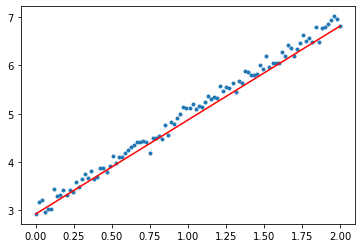

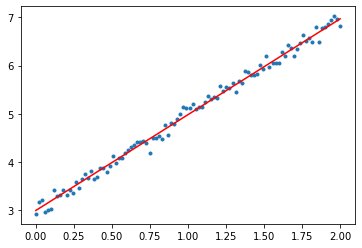

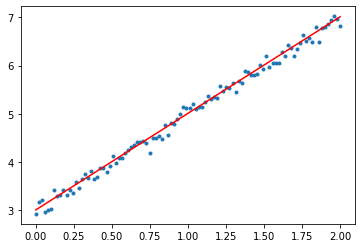

In [9]:
# Exécution de la méthode de la descente de gradient
a,b = descente_grad(f, grad, a, b)

In [10]:
# Somme des distances après exécution de la méthode de la descente de gradient
f(a, b)

8.103429164433216

# 4. Expérimentation avec quelques valeurs de la vitesse d'ajustement $\alpha$ et avec du nombre d'epochs

$\alpha$ = 1 et epochs = 5000 :

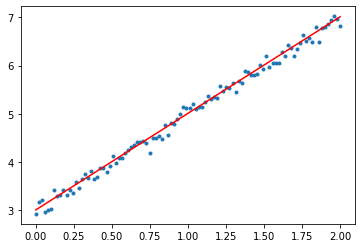

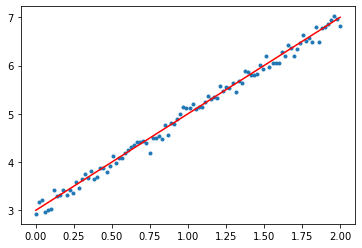

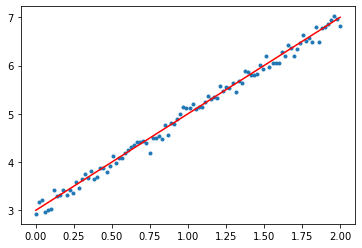

In [11]:
a,b = descente_grad(f, grad, a, b, alpha=0.0001, epochs=5000)

In [12]:
f(a,b)

8.028367387219289

$\alpha$ = 0.000001 et epochs = 10000 :

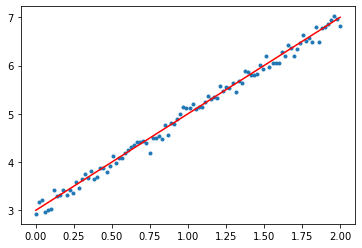

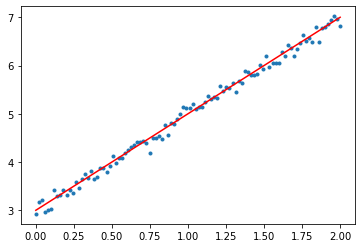

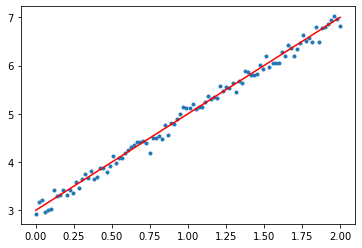

In [13]:
a,b = descente_grad(f, grad, a, b, alpha=0.000001, epochs=10000)

In [14]:
f(a,b)

8.028347516593959

On peut voir qu'en dimininuant le paramèters $\alpha$ (la grandeur des pas), on reduit la somme des distances. Cependant cette diminution est infinme.